# Introduction

This notebook runs the Stable Diffusion v1.4 model and variations of Stable Diffusion using HuggingFace `diffusers` library. You can run the notebook locally with as low as 6 GB of VRAM. This model is based on the [CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4) implementation. 

You just need to provide the Auth Token once for which you need a HuggingFace account.

The following few block cover the first time package installations and also the authentication process.

## Required Fist Time Installations

In [1]:
!pip install diffusers transformers huggingface-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.2 MB/s eta 0:00:00


In [1]:
import logging
import matplotlib.pyplot as plt
import torch

from pathlib import Path
from diffusers import StableDiffusionPipeline
from huggingface_hub import notebook_login

torch.manual_seed(1)

## Required First Time Authentication

Executing the following block the first time will show the following prompt.

![](images/huggingface-notebook-login.png)

You need to provide an authentication token once. You can find the token in by accessing your Hugginface account settings.

**`Click on the User Logo => Settings > Access Tokens`**

In case you don't have an access token, you can generate one and copy/past in the `Token` input box.

![](images/huggingface-user-access-token.png)

In [3]:
# The Auth Token Login process is needed only once when running on 
# local system.
if not (Path.home()/'.huggingface'/'token').exists(): 
    notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [2]:
CONFIGS = {
    'h': 512, # Defaut height
    'w': 512, # Defaut width
    'seed': 3407 # TORCH manual seed.
}

## Stable Diffusion 1.4

In [ ]:
model_id = 'CompVis/stable-diffusion-v1-4'
# We are loading the FP16 model here as that requires less memory compared to the FP32 model.
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True,
).to("cuda")

# We delete VAE encoder as we do not need it to generate images.
# This step frees up more than 2GB VRAM that allows us to run 
# Stable Diffusion on a 6GB VRAM GPU.
del pipe.vae.encoder

In [7]:
!ls ~/.cache/huggingface/diffusers/

ls: cannot access '/root/.cache/huggingface/diffusers/': No such file or directory


  0%|          | 0/150 [00:00<?, ?it/s]

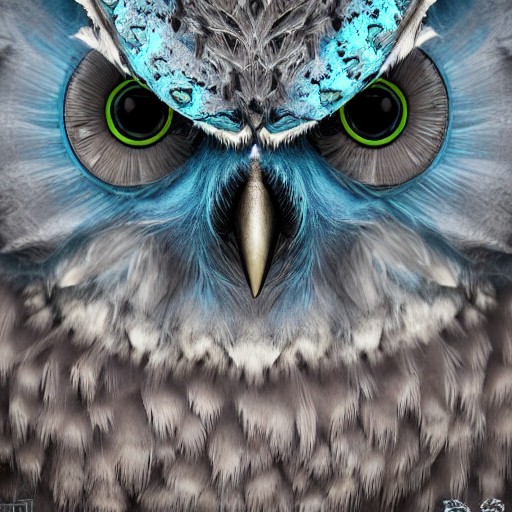

In [8]:
torch.manual_seed(CONFIGS['seed'])
prompt = "Anthropomorphic blue owl, highly detailed, big green eyes, portrait, \
         detailed armor, unreal engine, cinematic lighting, metal design, 8k, \
         octane render, realistic, redshift render"
pipe(
    prompt, height=CONFIGS['h'], width=CONFIGS['w'], num_inference_steps=150
).images[0]

## Arcane Diffusion

In [9]:
model_id = 'nitrosocke/Arcane-Diffusion'
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    torch_dtype=torch.float16,
    use_auth_token=True,
).to("cuda")

del pipe.vae.encoder

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/150 [00:00<?, ?it/s]

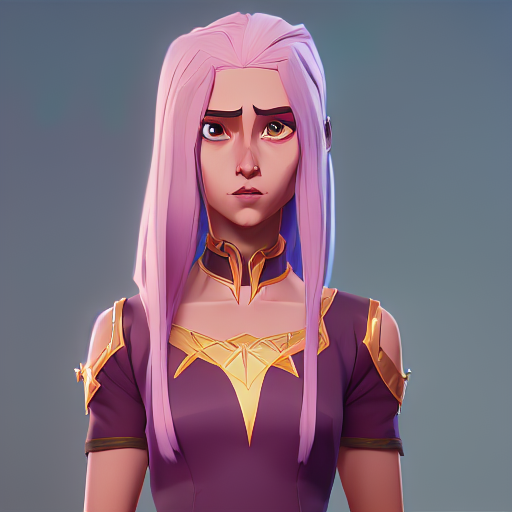

In [10]:
torch.manual_seed(CONFIGS['seed'])
prompt = "arcane style, a magical princess with golden hair"
pipe(
    prompt, height=CONFIGS['h'], width=CONFIGS['w'], num_inference_steps=150
).images[0]

## Robo Diffusion 

In [3]:
model_id = 'nousr/robo-diffusion-2-base'
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    torch_dtype=torch.float16,
    use_auth_token=True,
).to("cuda")

del pipe.vae.encoder

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


  0%|          | 0/150 [00:00<?, ?it/s]

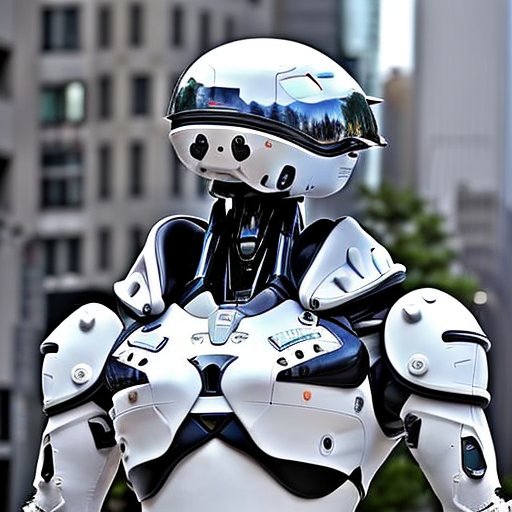

In [4]:
torch.manual_seed(CONFIGS['seed'])
prompt = "A realistic photograph of a 3d nousr robot in a modern city. \
          A glossy white and orange nousr robot"
pipe(
    prompt, height=CONFIGS['h'], width=CONFIGS['w'], num_inference_steps=150
).images[0]

## Open Journey

In [5]:
model_id = 'prompthero/openjourney'
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    torch_dtype=torch.float16,
    use_auth_token=True,
).to("cuda")

del pipe.vae.encoder

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/150 [00:00<?, ?it/s]

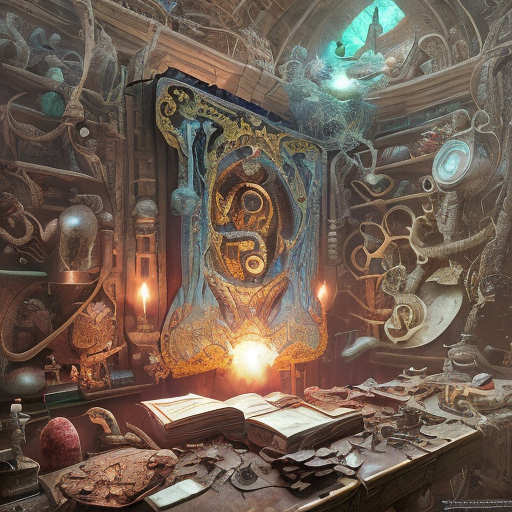

In [6]:
torch.manual_seed(CONFIGS['seed'])
prompt = "mdjrny-v4 style, magic spell book sitting on a table in the \
          catacombs, hypermaximalist, insanely detailed and intricate, octane \
          render, unreal engine, 8k, by greg rutkowski and Peter Mohrbacher \
          and magali villeneuve"
pipe(
    prompt, height=CONFIGS['h'], width=CONFIGS['w'], num_inference_steps=150
).images[0]

## Mo Di Diffusion

In [7]:
model_id = 'nitrosocke/mo-di-diffusion'
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    torch_dtype=torch.float16,
    use_auth_token=True,
).to("cuda")

del pipe.vae.encoder

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/150 [00:00<?, ?it/s]

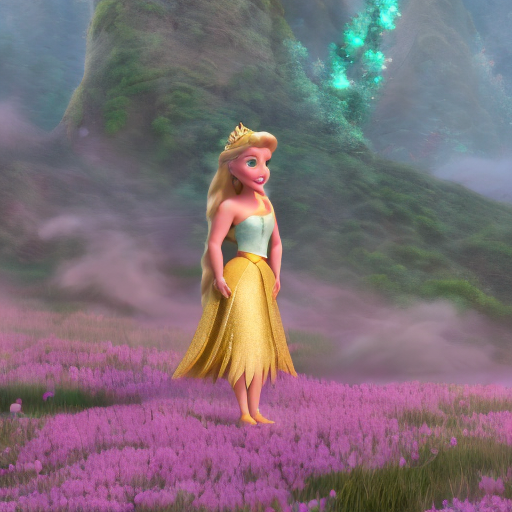

In [8]:
torch.manual_seed(CONFIGS['seed'])
prompt = "a magical princess with golden hair, modern disney style"
pipe(
    prompt, height=CONFIGS['h'], width=CONFIGS['w'], num_inference_steps=150
).images[0]